<a href="https://colab.research.google.com/github/maleal2/Developing-a-Human-like-Conversational-Chatbot/blob/main/Final_Project_Notebook_Team_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Developing a Human-like Conversational Chatbot**

Maria Carolina Leal Cardenas

Department of Graduate Studies-Engineering, University of San Diego

**Natural Language Processing and GenAI (AAI-520-04)**


# Setting up Environment.

In [ ]:
!pip install transformers datasets


INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.3 MB/s eta 0:00:00


In [ ]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.4/447.4 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/

In [ ]:
!pip install datasets


# Importing necessary libraries.

In [ ]:
# -------------------------------------------
# Operating System and File I/O Libraries
# -------------------------------------------

import os  # Provides a way of using operating system dependent functionality like reading or writing to the file system.
import zipfile  # Provides a tool to create, read, write, append, and list a ZIP file.
import csv  # Used to read from and write to CSV (Comma-Separated Values) files.
import urllib.request  # Allows for fetching data across the web (e.g., downloading files).
import pickle  # Serializes and deserializes Python object structures.

# -------------------------------------------
# Data Processing and Manipulation Libraries
# -------------------------------------------

import pandas as pd  # Provides data structures and data analysis tools.
import numpy as np  # Supports large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

# -------------------------------------------
# Regular Expressions and Data Counting Libraries
# -------------------------------------------

import re  # Provides regular expression matching operations.
from collections import Counter  # A dict subclass for counting hashable objects.

# -------------------------------------------
# PyTorch Libraries (Deep Learning)
# -------------------------------------------

import torch  # Core PyTorch library for tensor operations.
import torch.nn as nn  # Contains neural network layers, functions, and losses.
import torch.optim as optim  # Implements various optimization algorithms.
from torch.utils.data import DataLoader  # Provides tools to load datasets in batches for training.
import math  # Provides mathematical functions like exp, log, sqrt, etc.

# -------------------------------------------
# Hugging Face Transformers Libraries
# -------------------------------------------

from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments  # For fine-tuning and working with transformer models like GPT-2.
from datasets import Dataset, load_from_disk  # Provides tools for loading and managing datasets for machine learning.

# -------------------------------------------
# Visualization Libraries
# -------------------------------------------

import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations in Python.

# -------------------------------------------
# Progress Monitoring Libraries
# -------------------------------------------

from tqdm import tqdm  # Allows for displaying progress bars during loops or long computations.

# -------------------------------------------
# User Interface (Gradio)
# -------------------------------------------

import gradio as gr  # Library for building user interfaces in Python.


# Data preprocessing steps for LSTM based model.

In [ ]:
# -------------------------------------------
# Defining utility functions
# -------------------------------------------

# This function downloads and decompresses the Cornell Movie Dialogs corpus.
def download_and_decompress(url, storage_path, storage_dir):
    directory = os.path.join(storage_path, storage_dir)
    zip_file = f"{directory}.zip"
    a_file = os.path.join(directory, "cornell movie-dialogs corpus/README.txt")
    # Download and extract the dataset if not already downloaded.
    if not os.path.isfile(a_file):
        urllib.request.urlretrieve(url, zip_file)
        with zipfile.ZipFile(zip_file, 'r') as zfh:
            zfh.extractall(directory)
        print(f"Dataset downloaded and extracted to {directory}")
    else:
        print(f"Dataset already exists at {directory}")



# This function reads the conversations from the movie_conversations.txt file
def read_conversations(storage_path, storage_dir):
    filename = os.path.join(storage_path, storage_dir, "cornell movie-dialogs corpus/movie_conversations.txt")
    with open(filename, 'r', encoding="ISO-8859-1") as filehandler:
        conversations_chunks = [line.split(" +++$+++ ") for line in filehandler]
    # Returns only the dialog IDs in each conversation
    return [re.sub(r'[\[\]\']', '', element[3].strip()).split(",") for element in conversations_chunks]



# This function reads the actual lines of dialog from movie_lines.txt file
def read_lines(storage_path, storage_dir):
    filename = os.path.join(storage_path, storage_dir, "cornell movie-dialogs corpus/movie_lines.txt")
    with open(filename, 'r', encoding="ISO-8859-1") as filehandler:
        lines_chunks = [line.split(" +++$+++ ") for line in filehandler]
    # Maps each dialog ID to its corresponding line text
    return {line[0].strip(): line[-1].strip() for line in lines_chunks}



# This function generates tokenized sentence pairs (sequential conversation turns) from the data
def get_tokenized_sequential_sentences(list_of_lines, line_text):
    for line in list_of_lines:
        # Each conversation is tokenized into pairs of consecutive sentences
        for i in range(len(line) - 1):
            yield (line_text[line[i].strip()].split(" "), line_text[line[i+1].strip()].split(" "))


# Defines utility tokens and vocabulary used for padding and special tokens
def data_utils():
    _PAD, _EOS, _GO, _UNK = "_PAD", "_EOS", "_GO", "_UNK"
    _START_VOCAB = [_PAD, _EOS, _GO, _UNK]
    PAD_ID, EOS_ID, GO_ID, UNK_ID = 0, 1, 2, 3
    return _START_VOCAB, [PAD_ID, EOS_ID, GO_ID, UNK_ID]


# Creates a dictionary of the most frequent words in the dataset (used for token indexing)
def create_indexed_dictionary(sentences, dictionary_size=20000, storage_path=None):
    from collections import Counter
    count_words = Counter()
    dictionary_words = {}
    _START_VOCAB, OP_DICT_IDS = data_utils()
    opt_dictionary_size = len(OP_DICT_IDS)

    # Count word frequencies in the dataset
    for sentence in sentences:
        for word in sentence:
            count_words[word] += 1

    # Start with special tokens in the dictionary
    dictionary_words.update({_START_VOCAB[i]: OP_DICT_IDS[i] for i in range(len(OP_DICT_IDS))})

    # Add the most frequent words up to the specified dictionary size
    for idx, item in enumerate(count_words.most_common(dictionary_size)):
        dictionary_words[item[0]] = idx + opt_dictionary_size

    # Save dictionary to file if a storage path is provided
    if storage_path:
        with open(storage_path, "wb") as f:
            pickle.dump(dictionary_words, f)

    return dictionary_words


# Converts sentences into indexed representations using the dictionary
def sentences_to_indexes(sentences, indexed_dictionary):
    _, OP_DICT_IDS = data_utils()
    UNK_ID = OP_DICT_IDS[3]
    indexed_sentences = []

    # Replace words with their dictionary index or UNK_ID if not found
    for sentence in sentences:
        indexed_sentence = [indexed_dictionary.get(word, UNK_ID) for word in sentence]
        indexed_sentences.append(indexed_sentence)
    return indexed_sentences


# Prepares L1 and L2 sentence pairs, padding them to fixed lengths and adding special tokens
def prepare_sentences(sentences_l1, sentences_l2, len_l1, len_l2):
    assert len(sentences_l1) == len(sentences_l2)
    data_set = []
    _START_VOCAB, OP_DICT_IDS = data_utils()
    PAD_ID, GO_ID, EOS_ID = OP_DICT_IDS[0], OP_DICT_IDS[1], OP_DICT_IDS[2]


    # Pad L1 sentences from the left (source)
    # Pad L2 sentences from the right and add GO and EOS tokens (target)
    for i in range(len(sentences_l1)):
        padding_l1 = len_l1 - len(sentences_l1[i])
        pad_sentence_l1 = ([PAD_ID] * padding_l1) + sentences_l1[i]

        padding_l2 = len_l2 - len(sentences_l2[i])
        pad_sentence_l2 = [GO_ID] + sentences_l2[i] + [EOS_ID] + ([PAD_ID] * padding_l2)

        data_set.append([pad_sentence_l1, pad_sentence_l2])

    return data_set


# Save processed data to a CSV file
def save_data_to_csv(data_set, output_file):
    """Save the tokenized sentence pairs to a CSV file."""
    with open(output_file, mode='w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        # Writing each pair of padded input (L1) and output (L2) sentences
        for pair in data_set:
            writer.writerow([' '.join(map(str, pair[0])), ' '.join(map(str, pair[1]))])


# Save processed data to a TXT file
def save_data_to_txt(data_set, output_file):
    """Save the tokenized sentence pairs to a TXT file."""
    with open(output_file, mode='w', encoding='utf-8') as txtfile:
        for pair in data_set:
            txtfile.write(' '.join(map(str, pair[0])) + '\n')
            txtfile.write(' '.join(map(str, pair[1])) + '\n\n')



# -------------------------------------------
# Cleaning sentence function
# -------------------------------------------

# This function splits sentences using punctuation and lowercases everything
def clean_sentence(sentence):
    regex_splitter = re.compile(r"([!?.,:;$\"()])")
    clean_words = [re.split(regex_splitter, word.lower()) for word in sentence]
    return [w for words in clean_words for w in words if w]



# -------------------------------------------
# Sentence length filtering function
# -------------------------------------------

# This function filters out sentences that are too short or too long
def filter_sentence_length(sentences_l1, sentences_l2, min_len=1, max_len=50):
    filtered_sen_l1 = []
    filtered_sen_l2 = []
    for sen_l1, sen_l2 in zip(sentences_l1, sentences_l2):
        if min_len <= len(sen_l1) <= max_len and min_len <= len(sen_l2) <= max_len:
            filtered_sen_l1.append(sen_l1)
            filtered_sen_l2.append(sen_l2)
    return filtered_sen_l1, filtered_sen_l2



# -------------------------------------------
# Retrieve and process the Cornell Movie Dialogs corpus
# -------------------------------------------

# This function retrieves and processes the raw Cornell dataset
def retrieve_cornell_corpora(url, storage_path, storage_dir):
    download_and_decompress(url, storage_path, storage_dir)
    conversations = read_conversations(storage_path, storage_dir)
    lines = read_lines(storage_path, storage_dir)
    tokenized_data = list(get_tokenized_sequential_sentences(conversations, lines))
    sen_l1 = [pair[0] for pair in tokenized_data]
    sen_l2 = [pair[1] for pair in tokenized_data]
    return sen_l1, sen_l2



# -------------------------------------------
# Building and processing the dataset
# -------------------------------------------

# This function prepares the dataset for training, including cleaning, tokenization, and indexing
def build_dataset(url, storage_path, storage_dir, use_stored_dictionary=False):
    sen_l1, sen_l2 = retrieve_cornell_corpora(url, storage_path, storage_dir)

    clean_sen_l1 = [clean_sentence(s) for s in sen_l1]
    clean_sen_l2 = [clean_sentence(s) for s in sen_l2]

    filt_clean_sen_l1, filt_clean_sen_l2 = filter_sentence_length(clean_sen_l1, clean_sen_l2, max_len=50)

    if not use_stored_dictionary:
        dict_l1 = create_indexed_dictionary(filt_clean_sen_l1, dictionary_size=20000, storage_path=path_l1_dict)
        dict_l2 = create_indexed_dictionary(filt_clean_sen_l2, dictionary_size=20000, storage_path=path_l2_dict)
    else:
        dict_l1 = pickle.load(open(path_l1_dict, "rb"))
        dict_l2 = pickle.load(open(path_l2_dict, "rb"))

    dict_l1_length = len(dict_l1)
    dict_l2_length = len(dict_l2)

    idx_sentences_l1 = sentences_to_indexes(filt_clean_sen_l1, dict_l1)
    idx_sentences_l2 = sentences_to_indexes(filt_clean_sen_l2, dict_l2)

    data_set = prepare_sentences(idx_sentences_l1, idx_sentences_l2, 50, 50)

    print(f"Dataset shape (L1): {len(idx_sentences_l1)}, each sentence length: 50")
    print(f"Dataset shape (L2): {len(idx_sentences_l2)}, each sentence length: 50")

    return (filt_clean_sen_l1, filt_clean_sen_l2), data_set, (50, 50), (dict_l1_length, dict_l2_length)


# -------------------------------------------
# Project example usage.
# -------------------------------------------

url = "http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip"   # Replace with your URL's pathfille
storage_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project"                 # Replace with your storing directory's pathfille
storage_dir = "cornell_movie_dialogs"                                               # Replace with your Conerll Movie Dialog directory's pathfille

# Define file paths for saving dictionaries
path_l1_dict = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/dictionary_l1.pkl"   # Replace with your dictionary l1's dictionary's pathfile.
path_l2_dict = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/dictionary_l2.pkl"   # Replace with your dictionary l2's dictionary's pathfile.

# Define file paths for CSV and TXT output
csv_file_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/prepared_dataset.csv" # Replace with your storing csv directory's pathfile.
txt_file_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/prepared_dataset.txt" # Replace with your storing txt directory's pathfile.

# Build the dataset (tokenized, cleaned, and ready for training)
cleaned_sentences, dataset, (max_len_l1, max_len_l2), (dict_len_l1, dict_len_l2) = build_dataset(url, storage_path, storage_dir)

# Save the processed dataset to CSV and TXT for future use
save_data_to_csv(dataset, csv_file_path)
save_data_to_txt(dataset, txt_file_path)

print(f"Dataset has been saved to {csv_file_path} and {txt_file_path}")
print(f"Max lengths (L1, L2): {max_len_l1}, {max_len_l2}")
print(f"Dictionary sizes (L1, L2): {dict_len_l1}, {dict_len_l2}")


Dataset already exists at /content/drive/MyDrive/Colab Notebooks/NLP/Project/cornell_movie_dialogs
Dataset shape (L1): 211083, each sentence length: 50
Dataset shape (L2): 211083, each sentence length: 50
Dataset has been saved to /content/drive/MyDrive/Colab Notebooks/NLP/Project/prepared_dataset.csv and /content/drive/MyDrive/Colab Notebooks/NLP/Project/prepared_dataset.txt
Max lengths (L1, L2): 50, 50
Dictionary sizes (L1, L2): 20004, 20004


# Sequence-to-Sequence (Seq2Seq) training model.

### Function to load prepared dataset from CSV. (Optional).

In [ ]:
def load_dataset_from_csv(csv_file_path):
    """ This function lods the dataset from a CSV file into tokenized sentence pairs. This function is optional if you are running the code in one runtime"""
    data_set = []

    with open(csv_file_path, mode='r', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)

        for row in reader:
            l1_sentence = [int(token) for token in row[0].split()]
            l2_sentence = [int(token) for token in row[1].split()]
            data_set.append([l1_sentence, l2_sentence])

    return data_set

### Training of Seq2Seq model.

Epoch 1/50, Loss: 0.1424, Perplexity: 1.1530
Checkpoint saved at /content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/chatbot_model_checkpoint.pth
Epoch 2/50, Loss: 0.1289, Perplexity: 1.1375
Checkpoint saved at /content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/chatbot_model_checkpoint.pth
Epoch 3/50, Loss: 0.1237, Perplexity: 1.1316
Checkpoint saved at /content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/chatbot_model_checkpoint.pth
Epoch 4/50, Loss: 0.1201, Perplexity: 1.1276
Checkpoint saved at /content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/chatbot_model_checkpoint.pth
Epoch 5/50, Loss: 0.1175, Perplexity: 1.1247
Checkpoint saved at /content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/chatbot_model_checkpoint.pth
Epoch 6/50, Loss: 0.1154, Perplexity: 1.1223
Checkpoint saved at /content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/chatbot_model_checkpoint.pth
Epoch 7/50, Loss: 0.11

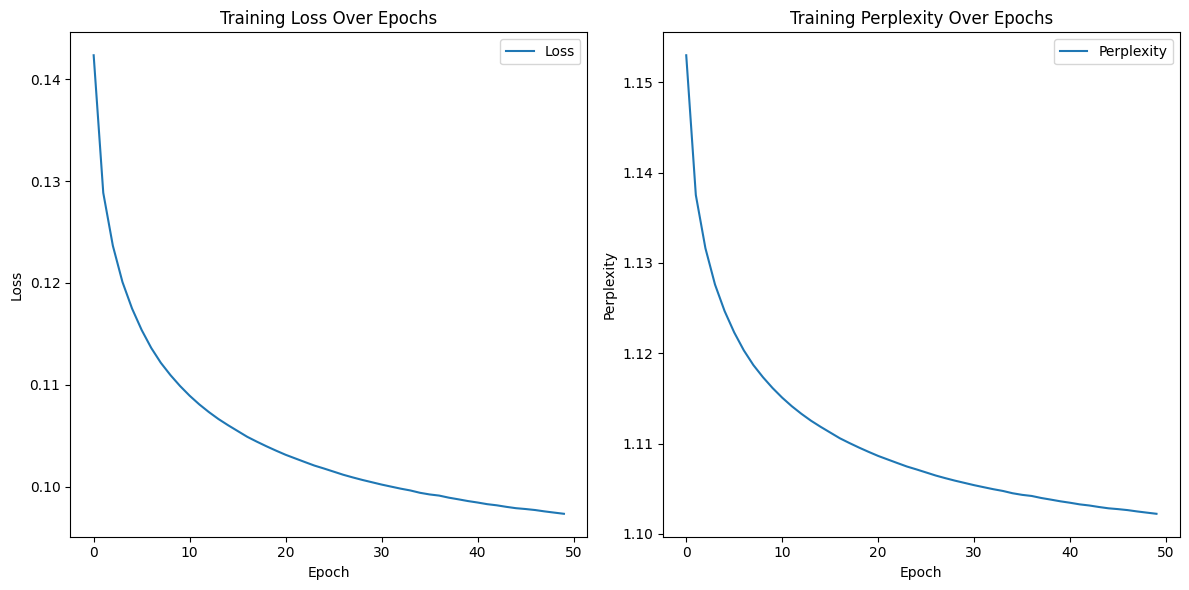

In [ ]:
# -------------------------------------------
#  Defining Seq2Seq Model with Embedding Layer
# -------------------------------------------

class Seq2SeqModel(nn.Module):
    def __init__(self, source_vocab_size, target_vocab_size, embed_size, hidden_size, num_layers, dropout):
        super(Seq2SeqModel, self).__init__()

        # Embedding layers for encoder and decoder
        self.encoder_embedding = nn.Embedding(source_vocab_size, embed_size)
        self.decoder_embedding = nn.Embedding(target_vocab_size, embed_size)

        # LSTM for encoder and decoder
        self.encoder_lstm = nn.LSTM(embed_size, hidden_size, num_layers, dropout=dropout, batch_first=True)
        self.decoder_lstm = nn.LSTM(embed_size, hidden_size, num_layers, dropout=dropout, batch_first=True)

        # Fully connected layer to project LSTM output to the target vocabulary size
        self.fc = nn.Linear(hidden_size, target_vocab_size)

        # Dropout
        self.dropout = nn.Dropout(dropout)

    def forward(self, encoder_inputs, decoder_inputs, hidden=None):
        # Embedding the input sequences
        embedded_encoder_inputs = self.dropout(self.encoder_embedding(encoder_inputs))
        embedded_decoder_inputs = self.dropout(self.decoder_embedding(decoder_inputs))

        # Pass through LSTM for encoder
        encoder_outputs, encoder_hidden = self.encoder_lstm(embedded_encoder_inputs, hidden)

        # Use encoder_hidden as the initial state for decoder LSTM
        decoder_outputs, decoder_hidden = self.decoder_lstm(embedded_decoder_inputs, encoder_hidden)

        # Apply the fully connected layer to project LSTM outputs to target vocab size
        logits = self.fc(decoder_outputs)

        return logits, decoder_hidden



# -------------------------------------------
# Function to load dataset from CSV
# -------------------------------------------

def load_dataset_from_csv(csv_file_path, limit=None):
    """Load the dataset from a CSV file into tokenized sentence pairs with an optional limit."""
    data_set = []

    with open(csv_file_path, mode='r', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)

        for idx, row in enumerate(reader):
            if limit and idx >= limit:
                break
            l1_sentence = [int(token) for token in row[0].split()]
            l2_sentence = [int(token) for token in row[1].split()]
            data_set.append([l1_sentence, l2_sentence])

    return data_set



# -------------------------------------------
# Defining Training Function with Checkpoint Saving
# -------------------------------------------

def train():
    """Train the Seq2Seq chatbot model and save checkpoints."""

    # Define file paths for CSV and model checkpoints
    csv_file_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/prepared_dataset.csv"  # Replace with your prepared's dataset directory's pathfile. (Note: this is optional if you are running the code in one runtime)
    checkpoint_dir = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints"    # Replace with your model_checkpoints's directory's pathfile.
    checkpoint_path = os.path.join(checkpoint_dir, "chatbot_model_checkpoint.pth")

    # Ensure the checkpoint directory exists
    os.makedirs(checkpoint_dir, exist_ok=True)

    # Load dataset from the previously saved CSV
    data_set = load_dataset_from_csv(csv_file_path, limit=None)  # You can try to set a limit to the dataset. For this project, we are loading the entire prepared dataset.

    # Parameters
    source_vocab_size = 20004  # # Vocabulary size of the source language. You can try with different values, depending on the resources of the VM where the code is being executed.
    target_vocab_size = 20004  # # Vocabulary size of the target language. You can try with different values, depending on the resources of the VM where the code is being executed.
    embed_size = 256  # Embedding dimensions
    hidden_size = 512  # LSTM hidden state size
    num_layers = 2  # Number of LSTM layers
    dropout = 0.3  # Dropout rate for regularization
    learning_rate = 0.001 # Learning rate for optimizer
    batch_size = 32 # Batch size for training. You can try different values, depending on the resources of the VM where the code is being executed.
    epochs = 50  # Number of training epochs.

    # Initialize model, loss function, and optimizer
    model = Seq2SeqModel(source_vocab_size, target_vocab_size, embed_size, hidden_size, num_layers, dropout)
    criterion = nn.CrossEntropyLoss(ignore_index=0)  # Ignoring padding (assume 0 is the pad index)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Use GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    # Lists to store loss and perplexity values for visualization
    loss_list = []
    perplexity_list = []

    # Training loop
    for epoch in range(epochs):
        model.train() # Set the model to training mode
        total_loss = 0
        total_tokens = 0

        # Create batches
        for i in range(0, len(data_set), batch_size):
            batch_data = data_set[i:i + batch_size]
            encoder_inputs = torch.tensor([pair[0] for pair in batch_data], dtype=torch.long).to(device)
            decoder_inputs = torch.tensor([pair[1] for pair in batch_data], dtype=torch.long).to(device)

            # Forward pass
            optimizer.zero_grad() # Clear the gradients
            logits, _ = model(encoder_inputs, decoder_inputs[:, :-1])  # Shift decoder inputs to match targets
            loss = criterion(logits.view(-1, target_vocab_size), decoder_inputs[:, 1:].contiguous().view(-1))  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update parameters

             # Track loss and the number of tokens processed
            total_loss += loss.item()
            total_tokens += (decoder_inputs[:, 1:] != 0).sum().item()  # Total number of non-padding tokens

        # Calculate average loss and perplexity for the epoch
        avg_loss = total_loss / len(data_set)
        perplexity = math.exp(avg_loss)  # Perplexity = exp(loss)

        # Append loss and perplexity for visualization
        loss_list.append(avg_loss)
        perplexity_list.append(perplexity)

        # Save model checkpoint after each epoch
        torch.save(model.state_dict(), checkpoint_path)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Perplexity: {perplexity:.4f}")
        print(f"Checkpoint saved at {checkpoint_path}")

    print("Training complete.")

    # Visualize Loss and Perplexity
    plt.figure(figsize=(12, 6))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(loss_list, label='Loss')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Perplexity
    plt.subplot(1, 2, 2)
    plt.plot(perplexity_list, label='Perplexity')
    plt.title('Training Perplexity Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Perplexity')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Run the training function
train()

# Sequence-to-Sequence (Seq2Seq) testing (Inference) model.

In [ ]:
# -------------------------------------------
# Define the Seq2SeqModel class
# -------------------------------------------

class Seq2SeqModel(nn.Module):
    def __init__(self, source_vocab_size, target_vocab_size, embed_size, hidden_size, num_layers, dropout):
        super(Seq2SeqModel, self).__init__()

        # Embedding layers for the encoder and decoder
        self.encoder_embedding = nn.Embedding(source_vocab_size, embed_size)
        self.decoder_embedding = nn.Embedding(target_vocab_size, embed_size)

        # LSTM for the encoder and decoder
        self.encoder_lstm = nn.LSTM(embed_size, hidden_size, num_layers, dropout=dropout, batch_first=True)
        self.decoder_lstm = nn.LSTM(embed_size, hidden_size, num_layers, dropout=dropout, batch_first=True)

        # Fully connected layer to project LSTM outputs to the target vocabulary size
        self.fc = nn.Linear(hidden_size, target_vocab_size)

        # Dropout for regularization to prevent overfitting
        self.dropout = nn.Dropout(dropout)

    def forward(self, encoder_inputs, decoder_inputs, hidden=None):
        # Embedding the input sequences for the encoder
        embedded_encoder_inputs = self.dropout(self.encoder_embedding(encoder_inputs))
        embedded_decoder_inputs = self.dropout(self.decoder_embedding(decoder_inputs))

        # Pass the embedded encoder inputs through the encoder LSTM
        encoder_outputs, encoder_hidden = self.encoder_lstm(embedded_encoder_inputs, hidden)

        # Use the encoder's final hidden state as the initial hidden state for the decoder LSTM
        decoder_outputs, decoder_hidden = self.decoder_lstm(embedded_decoder_inputs, encoder_hidden)

        # Project the decoder outputs to the target vocabulary size using the fully connected layer
        logits = self.fc(decoder_outputs)

        return logits, decoder_hidden



# -------------------------------------------
# Function to load dictionaries from pickle files
# -------------------------------------------

def load_dictionaries(path_l1_dict, path_l2_dict):
    """Load the source and target language dictionaries from pickle files. Note: This function is optional is the code is run in one runtime."""
    import pickle
    with open(path_l1_dict, 'rb') as f:
        dict_l1 = pickle.load(f)  # Source language dictionary
    with open(path_l2_dict, 'rb') as f:
        dict_l2 = pickle.load(f)  # Target language dictionary

    # Create the inverse dictionary for target language (id to word mapping)
    inv_dict_l2 = {v: k for k, v in dict_l2.items()}
    return dict_l1, dict_l2, inv_dict_l2



# -------------------------------------------
# Function to decode test sentences
# -------------------------------------------
def decode():
    """Decode some test sentences using the trained model."""

    # Load the trained model from the checkpoint
    model_checkpoints = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/chatbot_model_checkpoint.pth"   # Replace with your model_checkpoints' pathfile directory.
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available

    # Define the model with the same parameters as during training
    model = Seq2SeqModel(
        source_vocab_size=len(dict_l1),  # Same vocabulary size as during training
        target_vocab_size=len(dict_l2),  # Same vocabulary size as during training
        embed_size=256,
        hidden_size=512,
        num_layers=2,
        dropout=0.3
    ).to(device)

    # Load the model weights from the checkpoint
    model.load_state_dict(torch.load(model_checkpoints, map_location=device))
    model.eval()  # Set the model to evaluation mode

    # Test sentences for the chatbot to generate responses
    test_sentences = [
        "Hi, how are you?",
        "What is your name?",
        "Tell me a joke.",
        "Where do you live?",
        "Goodbye!"
    ]

    # Tokenize and index test sentences
    for sentence in test_sentences:
        tokens = sentence.lower().split()  # Convert sentence to lowercase and split into tokens
        token_ids = [dict_l1.get(token, dict_l1['_UNK']) for token in tokens]  # Convert tokens to their corresponding IDs

        # Convert to tensor and pad/truncate to match the max length
        encoder_input = torch.tensor([token_ids], dtype=torch.long).to(device)

        # Initialize the decoder input with the GO token
        decoder_input = torch.tensor([[dict_l1['_GO']]], dtype=torch.long).to(device)

        # Perform a forward pass through the model to generate the logits
        with torch.no_grad():
            logits, _ = model(encoder_input, decoder_input)

        # Get the predicted token IDs from the logits
        predicted_token_ids = logits.argmax(dim=-1).squeeze().tolist()  # Take the index of the highest logit value
        if not isinstance(predicted_token_ids, list):
            predicted_token_ids = [predicted_token_ids]

        # Convert the predicted token IDs back to words using the inverse dictionary
        predicted_sentence = ' '.join([inv_dict_l2.get(idx, '_UNK') for idx in predicted_token_ids if idx != dict_l1['_PAD']])

        # Print the input sentence and the model's predicted response
        print(f"Input: {sentence}")
        print(f"Predicted: {predicted_sentence}")
        print("-" * 30)



# -------------------------------------------
# File paths for dictionaries
# -------------------------------------------
path_l1_dict = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/dictionary_l1.pkl"  # Replace with your source language dictionary's pathfile.
path_l2_dict = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/dictionary_l2.pkl"  # Repkace with your Target language dictionary's pathfile.

# Load dictionaries and the inverse dictionary for decoding
dict_l1, dict_l2, inv_dict_l2 = load_dictionaries(path_l1_dict, path_l2_dict)

# Run the decode function to test the model
decode()

Input: Hi, how are you?
Predicted: i
------------------------------
Input: What is your name?
Predicted: marvellous
------------------------------
Input: Tell me a joke.
Predicted: i
------------------------------
Input: Where do you live?
Predicted: i
------------------------------
Input: Goodbye!
Predicted: lucky
------------------------------


# Data preprocessing steps for Generative Transformer Model (GPT-2)

In [ ]:
# -------------------------------------------
# Load Tokenizer and Model
# -------------------------------------------
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set the pad token as EOS token
model = GPT2LMHeadModel.from_pretrained("gpt2")



# -------------------------------------------
# Load Dataset from CSV
# -------------------------------------------
csv_file_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/cornell_dialogs_corpus_dataset_old.csv" # Replace with your Cornell Dialogs Corpus dataset's pathfile directory.

# Load CSV into a DataFrame
df = pd.read_csv(csv_file_path)

# Ensure the CSV has "First Sentence" and "Second Sentence" columns
df = df[['First Sentence', 'Second Sentence']]

# Convert the DataFrame into a Hugging Face Dataset
dataset = Dataset.from_pandas(df)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
print(dataset)  # Checking imported dataset.

Dataset({
    features: ['First Sentence', 'Second Sentence'],
    num_rows: 221616
})


In [ ]:
# -------------------------------------------
# Define Tokenization Function
# -------------------------------------------
def tokenize_function(examples):
    # Combine 'First Sentence' and 'Second Sentence' into a single string for GPT-2
    combined_dialogs = [f"{first} {second}" for first, second in zip(examples['First Sentence'], examples['Second Sentence'])]

    # Tokenize the combined dialogs, setting the 'labels' as the same as 'input_ids'
    tokenized_data = tokenizer(combined_dialogs, padding="max_length", truncation=True, max_length=1024)

    # Add labels for language model training (shifted input for GPT-2 training)
    tokenized_data['labels'] = tokenized_data['input_ids'].copy()

    return tokenized_data

# Apply tokenization to the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/221616 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets # Verifying tokenized dataset.

Dataset({
    features: ['First Sentence', 'Second Sentence', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 221616
})

# Phase I: Training for Generative Transformer Model (GPT-2).

In [ ]:
# -------------------------------------------
# Define Training Arguments
# -------------------------------------------
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot",  # Replace with your Output directory pathfile.
    overwrite_output_dir=True,
    per_device_train_batch_size=4,
    num_train_epochs=3,
    save_steps=500,  # Save every 500 steps
    save_total_limit=2,  # Limit the number of saved checkpoints
    logging_dir="/content/drive/MyDrive/Colab Notebooks/NLP/Project/logs",  # Replace with your Logging directory pathfile.
    logging_steps=10,
)

In [ ]:
# -------------------------------------------
# Initialize Trainer
# -------------------------------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets,
)



# -------------------------------------------
# Train Model
# -------------------------------------------
trainer.train()



# -------------------------------------------
# Save Fine-Tuned Model and Tokenizer
# -------------------------------------------
os.makedirs("/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot", exist_ok=True)   # Replace with your model_checkpoints' pathfile directory.

model.save_pretrained("/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot")        # Replace with your storing pretrained model's pathfile direcotry.
tokenizer.save_pretrained("/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot")    # Replace with your storing tokenized pre-trained model's pathfile directory.

print("Model and tokenizer have been saved!")


OutOfMemoryError: CUDA out of memory. Tried to allocate 786.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 29.06 MiB is free. Process 45391 has 14.72 GiB memory in use. Of the allocated memory 13.90 GiB is allocated by PyTorch, and 697.77 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

## Phase I- seconda part: Training for Generative Transformer Model (GPT-2). (Optional).

**Note**: The following running code is optional. The training was re-initiated from a saved checkpoint after a failure of low memory and storage space.

In [ ]:

# -------------------------------------------
# Load Tokenizer
# -------------------------------------------
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set the pad token as EOS token



# -------------------------------------------
# Load Dataset from CSV and Re-tokenize
# -------------------------------------------
csv_file_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/cornell_dialogs_corpus_dataset_old.csv"

# Load CSV into a DataFrame
df = pd.read_csv(csv_file_path)

# Ensure the CSV has "First Sentence" and "Second Sentence" columns
df = df[['First Sentence', 'Second Sentence']]

# Convert the DataFrame into a Hugging Face Dataset
dataset = Dataset.from_pandas(df)

# Define Tokenization Function
def tokenize_function(examples):
    # Combine 'First Sentence' and 'Second Sentence' into a single string for GPT-2
    combined_dialogs = [f"{first} {second}" for first, second in zip(examples['First Sentence'], examples['Second Sentence'])]

    # Tokenize the combined dialogs, setting the 'labels' as the same as 'input_ids'
    tokenized_data = tokenizer(combined_dialogs, padding="max_length", truncation=True, max_length=512)  # Adjust max_length if needed

    # Add labels for language model training (shifted input for GPT-2 training)
    tokenized_data['labels'] = tokenized_data['input_ids'].copy()

    return tokenized_data

# Apply tokenization to the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=['First Sentence', 'Second Sentence'])

# (Optional) Save the tokenized dataset to disk to avoid re-tokenization in the future
tokenized_dataset_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/tokenized_datasets"
tokenized_datasets.save_to_disk(tokenized_dataset_path)



# -------------------------------------------
# Load Model from Checkpoint
# -------------------------------------------
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot/checkpoint-21000"

# Load the model from the checkpoint
model = GPT2LMHeadModel.from_pretrained(checkpoint_path)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



# -------------------------------------------
# Define Training Arguments with Adjustments
# -------------------------------------------
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot",
    overwrite_output_dir=True,
    per_device_train_batch_size=2,  # Reduce batch size to 2
    gradient_accumulation_steps=4,  # Accumulate gradients over 4 steps
    num_train_epochs=3,  # Continue training to reach a total of 3 epochs
    save_steps=500,  # Save every 500 steps
    save_total_limit=2,  # Limit the number of saved checkpoints
    logging_dir="/content/drive/MyDrive/Colab Notebooks/NLP/Project/logs",
    logging_steps=10,
    fp16=True,  # Enable mixed precision if supported
)



# -------------------------------------------
# Initialize Trainer
# -------------------------------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets,
)



# -------------------------------------------
# Resume Training from Checkpoint
# -------------------------------------------
trainer.train(resume_from_checkpoint=checkpoint_path)



# -------------------------------------------
# Save Fine-Tuned Model and Tokenizer
# -------------------------------------------
model_output_dir = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot_final"
os.makedirs(model_output_dir, exist_ok=True)
model.save_pretrained(model_output_dir)
tokenizer.save_pretrained(model_output_dir)

print("Model and tokenizer have been saved!")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/221616 [00:00<?, ? examples/s]

Saving the dataset (0/3 shards):   0%|          | 0/221616 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
There were missing keys in the checkpoint model loaded: ['lm_head.weight'].
/usr/local/lib/python3.10/dist-packages/transformers/trainer.py:3098: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowli

Model and tokenizer have been saved!


## Perplexity calculation on training set for Generative Transformer Model (GPT-2).

In [ ]:
# -------------------------------------------
# Load Tokenizer and Model from Checkpoint
# -------------------------------------------
model_output_dir = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot_final" # Replace with your directory pathfile.

# Load the fine-tuned model and tokenizer from the checkpoint
tokenizer = GPT2Tokenizer.from_pretrained(model_output_dir)
model = GPT2LMHeadModel.from_pretrained(model_output_dir)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



# -------------------------------------------
# Load the Tokenized Dataset
# -------------------------------------------
tokenized_dataset_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/tokenized_datasets" # Replace with your directory pathfile.
tokenized_datasets = load_from_disk(tokenized_dataset_path)

# Since your dataset has no split like "train", we just access the full dataset directly
tokenized_data = tokenized_datasets  # The dataset itself is already tokenized

# -------------------------------------------
# Function to Calculate Perplexity
# -------------------------------------------
def calculate_perplexity(model, dataset, device):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0.0
    total_tokens = 0

    for i, example in enumerate(dataset):
        # Get the input_ids and labels (same as input_ids for language modeling)
        input_ids = torch.tensor(example['input_ids']).unsqueeze(0).to(device)  # Add batch dimension
        labels = torch.tensor(example['labels']).unsqueeze(0).to(device)  # Add batch dimension

        # Calculate the loss
        with torch.no_grad():
            outputs = model(input_ids, labels=labels)
            loss = outputs.loss
            total_loss += loss.item() * input_ids.size(1)  # Multiply by number of tokens in the batch
            total_tokens += input_ids.size(1)

        # Print progress for larger datasets
        if i % 100 == 0:
            print(f"Processed {i} samples")

    # Calculate perplexity
    avg_loss = total_loss / total_tokens
    perplexity = math.exp(avg_loss)

    return perplexity

# -------------------------------------------
# Calculate and Print Perplexity
# -------------------------------------------
perplexity = calculate_perplexity(model, tokenized_data, device)
print(f"Perplexity: {perplexity}")



Processed 0 samples
Processed 100 samples
Processed 200 samples
Processed 300 samples
Processed 400 samples
Processed 500 samples
Processed 600 samples
Processed 700 samples
Processed 800 samples
Processed 900 samples
Processed 1000 samples
Processed 1100 samples
Processed 1200 samples
Processed 1300 samples
Processed 1400 samples
Processed 1500 samples
Processed 1600 samples
Processed 1700 samples
Processed 1800 samples
Processed 1900 samples
Processed 2000 samples
Processed 2100 samples
Processed 2200 samples
Processed 2300 samples
Processed 2400 samples
Processed 2500 samples
Processed 2600 samples
Processed 2700 samples
Processed 2800 samples
Processed 2900 samples
Processed 3000 samples
Processed 3100 samples
Processed 3200 samples
Processed 3300 samples
Processed 3400 samples
Processed 3500 samples
Processed 3600 samples
Processed 3700 samples
Processed 3800 samples
Processed 3900 samples
Processed 4000 samples
Processed 4100 samples
Processed 4200 samples
Processed 4300 samples


# Phase I : Testing for Generative Transformer Model (GPT-2).

In [ ]:
# Paths to model checkpoint and tokenized dataset
model_output_dir = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot/checkpoint-29000" # Replace with your directory pathfile.
tokenized_datasets_dir = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/tokenized_datasets" # Replace with your directory pathfile.

# Load the tokenized dataset from the saved disk directory
tokenized_datasets = load_from_disk(tokenized_datasets_dir)

# Load the tokenizer from the base GPT-2 model or the previously saved tokenizer directory
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set pad token to EOS if necessary

# Load the fine-tuned model from the last checkpoint
model = GPT2LMHeadModel.from_pretrained(model_output_dir)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to Generate Text Response using the model
def generate_response(prompt, max_length=50):
    inputs = tokenizer.encode(prompt, return_tensors='pt').to(device)
    model.eval()

    # Generate text with beam search for improved quality
    with torch.no_grad():
        outputs = model.generate(
            inputs,
            max_length=max_length,
            num_beams=5,  # Beam search for better responses
            no_repeat_ngram_size=2,  # Avoid repetitive phrases
            early_stopping=True,
            pad_token_id=tokenizer.eos_token_id  # Set EOS token as the padding token
        )

    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generated_text

# Example test prompts
test_prompts = [
    "Hello! How are you today?",
    "Tell me a story about a brave knight.",
    "What's your favorite movie?",
    "Do you know any jokes?"
]

# Generate and print responses for each test prompt
for prompt in test_prompts:
    response = generate_response(prompt, max_length=500)
    print(f"Prompt: {prompt}")
    print(f"Response: {response}")
    print("-" * 200)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Prompt: Hello! How are you today?
Response: Hello! How are you today? I'm fine.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Prompt: Tell me a story about a brave knight.
Response: Tell me a story about a brave knight. Tell me what happened to him.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Prompt: What's your favorite movie?
Response: What's your favorite movie? I don't know.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Prompt: Do you know any jokes?
Response: Do you know any jokes? No, I don't.
----------------------------

##  Phase I : Testing for Generative Transformer Model (GPT-2). Using different text examples and customizing parameters as : Top-k sampling, Nucleus sampling and Temperature.

In [ ]:
# Path to the fine-tuned model and tokenizer
model_output_dir = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot_final" # Replace with your directory pathfile.

# Load the tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained(model_output_dir)
model = GPT2LMHeadModel.from_pretrained(model_output_dir)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set the model to evaluation mode
model.eval()

# Define a function to generate responses with attention mask and adjusted decoding parameters
def generate_response(prompt, max_length=100, num_return_sequences=1):
    # Tokenize the input prompt
    inputs = tokenizer(prompt, return_tensors="pt", padding=True).to(device)

    # Generate the output (response) from the model
    outputs = model.generate(
        inputs["input_ids"],
        attention_mask=inputs["attention_mask"],  # Provide attention mask to handle padding
        max_length=max_length,
        num_return_sequences=num_return_sequences,
        no_repeat_ngram_size=2,  # Prevent repeating n-grams
        do_sample=True,  # Enable sampling to get diverse responses
        top_k=50,  # Top-k sampling
        top_p=0.95,  # Nucleus sampling
        temperature=0.7,  # Adjust the randomness
        pad_token_id=tokenizer.eos_token_id  # Set the pad token ID
    )

    # Decode and return the generated response(s)
    return [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]

# Test the chatbot with a few prompts
test_prompts = [
    "My name is Charles, what about you?",
    "What do you think about Once Upon a Time in Hollywood?",
    "What is your favorite movie?",
    "Do you think Godzilla will kill us all?",
    "What do you think about Jupiter?",
    "Hi!"
]

# Generate and print responses for each test prompt
for prompt in test_prompts:
    response = generate_response(prompt, max_length=100)
    print(f"Input: {prompt}")
    print(f"Response: {response[0]}")
    print("-" * 30)



Input: My name is Charles, what about you?
Response: My name is Charles, what about you? Charles?
------------------------------
Input: What do you think about Once Upon a Time in Hollywood?
Response: What do you think about Once Upon a Time in Hollywood? Oh, it's a novel, Harry, but it gets better and better every time you read it.  You know what I'm thinking?
------------------------------
Input: What is your favorite movie?
Response: What is your favorite movie?  A novel? I don't know.
------------------------------
Input: Do you think Godzilla will kill us all?
Response: Do you think Godzilla will kill us all? No.
------------------------------
Input: What do you think about Jupiter?
Response: What do you think about Jupiter? You know, I don't know.
------------------------------
Input: Hi!
Response: Hi!  What's up? I'm afraid I have a little problem with my back.
------------------------------


##  Phase I : Testing for Generative Transformer Model (GPT-2). Using different text examples without Nucleus p-samples customization.

In [ ]:
# Load the fine-tuned model and tokenizer from the checkpoint
model_output_dir = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot_final"
tokenizer = GPT2Tokenizer.from_pretrained(model_output_dir)
model = GPT2LMHeadModel.from_pretrained(model_output_dir)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set the model to evaluation mode
model.eval()

# Function to generate a response with refinements
def generate_response(input_text, max_length=100, temperature=0.7, top_k=50):
    # Tokenize input and move to device
    inputs = tokenizer(input_text, return_tensors="pt").to(device)

    # Generate response with top-k sampling and temperature adjustment
    output = model.generate(
        inputs.input_ids,
        max_length=max_length,
        temperature=temperature,
        top_k=top_k,
        pad_token_id=tokenizer.eos_token_id,  # Ensure padding is handled
        num_return_sequences=1,
        do_sample=True,  # Enable sampling
    )

    # Decode the output and return the response
    response = tokenizer.decode(output[0], skip_special_tokens=True)
    return response

# Test the refined response generation
def test_conversation():
    prompts = [
        "My name is Charles, what about you?",
        "What do you think about Once Upon a Time in Hollywood?",
        "What is your favorite movie?",
        "Do you think Godzilla will kill us all?",
        "What do you think about Jupiter?",
        "Hi!",
    ]

    for prompt in prompts:
        response = generate_response(prompt)
        print(f"Input: {prompt}")
        print(f"Response: {response}")
        print("-" * 30)

# Run the conversation test
test_conversation()


Input: My name is Charles, what about you?
Response: My name is Charles, what about you? Am I supposed to tell you there is no one here?
------------------------------
Input: What do you think about Once Upon a Time in Hollywood?
Response: What do you think about Once Upon a Time in Hollywood? It's my life.
------------------------------
Input: What is your favorite movie?
Response: What is your favorite movie? "Oh, my God...The Idiot".
------------------------------
Input: Do you think Godzilla will kill us all?
Response: Do you think Godzilla will kill us all? I don't think so.  We have to stop him.
------------------------------
Input: What do you think about Jupiter?
Response: What do you think about Jupiter? Maybe I shoulda asked if you were going to be friends with him.
------------------------------
Input: Hi!
Response: Hi!  You look great!  Do you have any special gifts? No thank you, hon.  I can't find a thing to do with them and I haven't had a shower in two weeks.  I'm going

# Phase II: Training for Generative Transformer Model (GPT-2).

In [ ]:
# -------------------------------------------
# Load Tokenizer
# -------------------------------------------
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set the pad token as EOS token

# -------------------------------------------
# Load Dataset from CSV and Re-tokenize
# -------------------------------------------
csv_file_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/cornell_dialogs_corpus_dataset_old.csv" # Replace with your directory pathfile.

# Load CSV into a DataFrame
df = pd.read_csv(csv_file_path)

# Ensure the CSV has "First Sentence" and "Second Sentence" columns
df = df[['First Sentence', 'Second Sentence']]

# Convert the DataFrame into a Hugging Face Dataset
dataset = Dataset.from_pandas(df)

# Define Tokenization Function
def tokenize_function(examples):
    # Combine 'First Sentence' and 'Second Sentence' into a single string for GPT-2
    combined_dialogs = [f"{first} {second}" for first, second in zip(examples['First Sentence'], examples['Second Sentence'])]

    # Tokenize the combined dialogs, setting the 'labels' as the same as 'input_ids'
    tokenized_data = tokenizer(combined_dialogs, padding="max_length", truncation=True, max_length=512)  # Adjust max_length if needed

    # Add labels for language model training (shifted input for GPT-2 training)
    tokenized_data['labels'] = tokenized_data['input_ids'].copy()

    return tokenized_data

# Apply tokenization to the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=['First Sentence', 'Second Sentence'])

# (Optional) Save the tokenized dataset to disk to avoid re-tokenization in the future
tokenized_dataset_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/tokenized_datasets" # Replace with your directory pathfile.
tokenized_datasets.save_to_disk(tokenized_dataset_path)

# -------------------------------------------
# Load Model from Checkpoint
# -------------------------------------------
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot/checkpoint-29000" # Replace with your directory pathfile.

# Load the model from the checkpoint
model = GPT2LMHeadModel.from_pretrained(checkpoint_path)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# -------------------------------------------
# Define Training Arguments with Adjustments
# -------------------------------------------
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot", # Replace with your directory pathfile.
    overwrite_output_dir=True,
    per_device_train_batch_size=2,  # Reduce batch size to 2
    gradient_accumulation_steps=4,  # Accumulate gradients over 4 steps
    num_train_epochs=6,  # Continue training to reach a total of 6 epochs
    save_steps=500,  # Save every 500 steps
    save_total_limit=2,  # Limit the number of saved checkpoints
    logging_dir="/content/drive/MyDrive/Colab Notebooks/NLP/Project/logs", # Replace with your directory pathfile.
    logging_steps=10,
    fp16=True,  # Enable mixed precision if supported
)

# -------------------------------------------
# Initialize Trainer
# -------------------------------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets,
)

# -------------------------------------------
# Resume Training from Checkpoint
# -------------------------------------------
trainer.train(resume_from_checkpoint=checkpoint_path)

# -------------------------------------------
# Save Fine-Tuned Model and Tokenizer
# -------------------------------------------
model_output_dir = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot_final" # Replace with your directory pathfile.
os.makedirs(model_output_dir, exist_ok=True)
model.save_pretrained(model_output_dir)
tokenizer.save_pretrained(model_output_dir)

print("Model and tokenizer have been saved!")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/221616 [00:00<?, ? examples/s]

Saving the dataset (0/3 shards):   0%|          | 0/221616 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
There were missing keys in the checkpoint model loaded: ['lm_head.weight'].
	per_device_train_batch_size: 2 (from args) != 4 (from trainer_state.json)
/usr/local/lib/python3.10/dist-packages/transformers/trainer.py:2833: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no long

KeyboardInterrupt: 

## Phase II- second part: Training for Generative Transformer Model (GPT-2). (Optional).

**Note**: The following running code is optional. The training was re-initiated from a saved checkpoint after a failure of low memory and storage space.

In [ ]:
# -------------------------------------------
# Load Tokenizer
# -------------------------------------------
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set the pad token as EOS token



# -------------------------------------------
# Load Dataset from CSV and Re-tokenize
# -------------------------------------------
csv_file_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/cornell_dialogs_corpus_dataset_old.csv" # Replace with your directory pathfile.

# Load CSV into a DataFrame
df = pd.read_csv(csv_file_path)

# Ensure the CSV has "First Sentence" and "Second Sentence" columns
df = df[['First Sentence', 'Second Sentence']]

# Convert the DataFrame into a Hugging Face Dataset
dataset = Dataset.from_pandas(df)

# Define Tokenization Function
def tokenize_function(examples):
    # Combine 'First Sentence' and 'Second Sentence' into a single string for GPT-2
    combined_dialogs = [f"{first} {second}" for first, second in zip(examples['First Sentence'], examples['Second Sentence'])]

    # Tokenize the combined dialogs, setting the 'labels' as the same as 'input_ids'
    tokenized_data = tokenizer(combined_dialogs, padding="max_length", truncation=True, max_length=512)  # Adjust max_length if needed

    # Add labels for language model training (shifted input for GPT-2 training)
    tokenized_data['labels'] = tokenized_data['input_ids'].copy()

    return tokenized_data

# Apply tokenization to the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=['First Sentence', 'Second Sentence'])

# (Optional) Save the tokenized dataset to disk to avoid re-tokenization in the future
tokenized_dataset_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/tokenized_datasets" # Replace with your directory pathfile.
tokenized_datasets.save_to_disk(tokenized_dataset_path)



# -------------------------------------------
# Load Model from Checkpoint
# -------------------------------------------
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot/checkpoint-47500"  # Replace with your directory pathfile.

# Load the model from the checkpoint
model = GPT2LMHeadModel.from_pretrained(checkpoint_path)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



# -------------------------------------------
# Define Training Arguments with Adjustments
# -------------------------------------------
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot", # Replace with your directory pathfile.
    overwrite_output_dir=True,
    per_device_train_batch_size=2,  # Reduce batch size to 2
    gradient_accumulation_steps=4,  # Accumulate gradients over 4 steps
    num_train_epochs=6,  # Continue training to reach a total of 6 epochs
    save_steps=500,  # Save every 500 steps
    save_total_limit=2,  # Limit the number of saved checkpoints
    logging_dir="/content/drive/MyDrive/Colab Notebooks/NLP/Project/logs", # Replace with your directory pathfile.
    logging_steps=10,
    fp16=True,  # Enable mixed precision if supported
)



# -------------------------------------------
# Initialize Trainer
# -------------------------------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets,
)



# -------------------------------------------
# Resume Training from Checkpoint
# -------------------------------------------
trainer.train(resume_from_checkpoint=checkpoint_path)



# -------------------------------------------
# Save Fine-Tuned Model and Tokenizer
# -------------------------------------------
model_output_dir = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot_final" # Replace with your directory pathfile.
os.makedirs(model_output_dir, exist_ok=True)
model.save_pretrained(model_output_dir)
tokenizer.save_pretrained(model_output_dir)

print("Model and tokenizer have been saved!")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/221616 [00:00<?, ? examples/s]

Saving the dataset (0/3 shards):   0%|          | 0/221616 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
There were missing keys in the checkpoint model loaded: ['lm_head.weight'].
/usr/local/lib/python3.10/dist-packages/transformers/trainer.py:3098: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowli

Model and tokenizer have been saved!


## Phase II- third part: Training for Generative Transformer Model (GPT-2). (Optional).

In [ ]:
# -------------------------------------------
# Load Tokenizer
# -------------------------------------------
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set the pad token as EOS token



# -------------------------------------------
# Load Dataset from CSV and Re-tokenize
# -------------------------------------------
csv_file_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/cornell_dialogs_corpus_dataset_old.csv" # Replave with your pathfile directory.

# Load CSV into a DataFrame
df = pd.read_csv(csv_file_path)

# Ensure the CSV has "First Sentence" and "Second Sentence" columns
df = df[['First Sentence', 'Second Sentence']]

# Convert the DataFrame into a Hugging Face Dataset
dataset = Dataset.from_pandas(df)

# Define Tokenization Function
def tokenize_function(examples):
    # Combine 'First Sentence' and 'Second Sentence' into a single string for GPT-2
    combined_dialogs = [f"{first} {second}" for first, second in zip(examples['First Sentence'], examples['Second Sentence'])]

    # Tokenize the combined dialogs, setting the 'labels' as the same as 'input_ids'
    tokenized_data = tokenizer(combined_dialogs, padding="max_length", truncation=True, max_length=512)  # Adjust max_length if needed

    # Add labels for language model training (shifted input for GPT-2 training)
    tokenized_data['labels'] = tokenized_data['input_ids'].copy()

    return tokenized_data

# Apply tokenization to the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=['First Sentence', 'Second Sentence'])

# (Optional) Save the tokenized dataset to disk to avoid re-tokenization in the future
tokenized_dataset_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/tokenized_datasets" # Replave with your pathfile directory.
tokenized_datasets.save_to_disk(tokenized_dataset_path)



# -------------------------------------------
# Load Model from Checkpoint
# -------------------------------------------
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot/checkpoint-83106" # Replave with your pathfile directory.

# Load the model from the checkpoint
model = GPT2LMHeadModel.from_pretrained(checkpoint_path)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



# -------------------------------------------
# Define Training Arguments with Adjustments
# -------------------------------------------
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot", # Replave with your pathfile directory.
    overwrite_output_dir=True,
    per_device_train_batch_size=2,  # Reduce batch size to 2
    gradient_accumulation_steps=4,  # Accumulate gradients over 4 steps
    num_train_epochs=12,  # Continue training to reach a total of 9 epochs
    save_steps=500,  # Save every 500 steps
    save_total_limit=2,  # Limit the number of saved checkpoints
    logging_dir="/content/drive/MyDrive/Colab Notebooks/NLP/Project/logs", # Replave with your pathfile directory.
    logging_steps=10,
    fp16=True,  # Enable mixed precision if supported
)



# -------------------------------------------
# Initialize Trainer
# -------------------------------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets,
)



# -------------------------------------------
# Resume Training from Checkpoint
# -------------------------------------------
trainer.train(resume_from_checkpoint=checkpoint_path)



# -------------------------------------------
# Save Fine-Tuned Model and Tokenizer
# -------------------------------------------
model_output_dir = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot_final_v2" # Replave with your pathfile directory.
os.makedirs(model_output_dir, exist_ok=True)
model.save_pretrained(model_output_dir)
tokenizer.save_pretrained(model_output_dir)

print("Model and tokenizer have been saved!")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/221616 [00:00<?, ? examples/s]

Saving the dataset (0/3 shards):   0%|          | 0/221616 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
There were missing keys in the checkpoint model loaded: ['lm_head.weight'].
/usr/local/lib/python3.10/dist-packages/transformers/trainer.py:3098: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowli

FailedPreconditionError: /content/drive/MyDrive/Colab Notebooks/NLP/Project/logs/events.out.tfevents.1727850198.c3dd3dc1a496.2083.1; Transport endpoint is not connected

## Phase II- fourth part: Training for Generative Transformer Model (GPT-2). (Optional).

**Note**: The following running code is optional. The training was re-initiated from a saved checkpoint after a failure of low memory and storage space.

In [ ]:
# -------------------------------------------
# Load Tokenizer
# -------------------------------------------
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set the pad token as EOS token



# -------------------------------------------
# Load Dataset from CSV and Re-tokenize
# -------------------------------------------
csv_file_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/cornell_dialogs_corpus_dataset_old.csv" # Replace with your pathfile directory.

# Load CSV into a DataFrame
df = pd.read_csv(csv_file_path)

# Ensure the CSV has "First Sentence" and "Second Sentence" columns
df = df[['First Sentence', 'Second Sentence']]

# Convert the DataFrame into a Hugging Face Dataset
dataset = Dataset.from_pandas(df)

# Define Tokenization Function
def tokenize_function(examples):
    # Combine 'First Sentence' and 'Second Sentence' into a single string for GPT-2
    combined_dialogs = [f"{first} {second}" for first, second in zip(examples['First Sentence'], examples['Second Sentence'])]

    # Tokenize the combined dialogs, setting the 'labels' as the same as 'input_ids'
    tokenized_data = tokenizer(combined_dialogs, padding="max_length", truncation=True, max_length=512)  # Adjust max_length if needed

    # Add labels for language model training (shifted input for GPT-2 training)
    tokenized_data['labels'] = tokenized_data['input_ids'].copy()

    return tokenized_data

# Apply tokenization to the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=['First Sentence', 'Second Sentence'])

# (Optional) Save the tokenized dataset to disk to avoid re-tokenization in the future
tokenized_dataset_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/tokenized_datasets" # Replace with your pathfile directory.
tokenized_datasets.save_to_disk(tokenized_dataset_path)



# -------------------------------------------
# Load Model from Checkpoint
# -------------------------------------------
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot/checkpoint-121500" # Replace with your pathfile directory.

# Load the model from the checkpoint
model = GPT2LMHeadModel.from_pretrained(checkpoint_path)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



# -------------------------------------------
# Define Training Arguments with Adjustments
# -------------------------------------------
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot", # Replace with your pathfile directory.
    overwrite_output_dir=True,
    per_device_train_batch_size=2,  # Reduce batch size to 2
    gradient_accumulation_steps=4,  # Accumulate gradients over 4 steps
    num_train_epochs=9,  # Continue training to reach a total of 9 epochs
    save_steps=500,  # Save every 500 steps
    save_total_limit=2,  # Limit the number of saved checkpoints
    logging_dir="/content/drive/MyDrive/Colab Notebooks/NLP/Project/logs",  # Replace with your pathfile directory.
    logging_steps=10,
    fp16=True,  # Enable mixed precision if supported
)



# -------------------------------------------
# Initialize Trainer
# -------------------------------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets,
)



# -------------------------------------------
# Resume Training from Checkpoint
# -------------------------------------------
trainer.train(resume_from_checkpoint=checkpoint_path)



# -------------------------------------------
# Save Fine-Tuned Model and Tokenizer
# -------------------------------------------
model_output_dir = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot_final_v2" # Replace with your pathfile directory.
os.makedirs(model_output_dir, exist_ok=True)
model.save_pretrained(model_output_dir)
tokenizer.save_pretrained(model_output_dir)

print("Model and tokenizer have been saved!")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/221616 [00:00<?, ? examples/s]

Saving the dataset (0/3 shards):   0%|          | 0/221616 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
There were missing keys in the checkpoint model loaded: ['lm_head.weight'].
/usr/local/lib/python3.10/dist-packages/transformers/trainer.py:3098: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowli

Model and tokenizer have been saved!


## Phase II- fifth part: Training for Generative Transformer Model (GPT-2). (Optional).

In [ ]:
# -------------------------------------------
# Load Tokenizer
# -------------------------------------------
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set the pad token as EOS token



# -------------------------------------------
# Load Dataset from CSV and Re-tokenize
# -------------------------------------------
csv_file_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/cornell_dialogs_corpus_dataset_old.csv" # Replace with your pathfile directory.

# Load CSV into a DataFrame
df = pd.read_csv(csv_file_path)

# Ensure the CSV has "First Sentence" and "Second Sentence" columns
df = df[['First Sentence', 'Second Sentence']]

# Convert the DataFrame into a Hugging Face Dataset
dataset = Dataset.from_pandas(df)

# Define Tokenization Function
def tokenize_function(examples):
    # Combine 'First Sentence' and 'Second Sentence' into a single string for GPT-2
    combined_dialogs = [f"{first} {second}" for first, second in zip(examples['First Sentence'], examples['Second Sentence'])]

    # Tokenize the combined dialogs, setting the 'labels' as the same as 'input_ids'
    tokenized_data = tokenizer(combined_dialogs, padding="max_length", truncation=True, max_length=512)  # Adjust max_length if needed

    # Add labels for language model training (shifted input for GPT-2 training)
    tokenized_data['labels'] = tokenized_data['input_ids'].copy()

    return tokenized_data

# Apply tokenization to the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=['First Sentence', 'Second Sentence'])

# (Optional) Save the tokenized dataset to disk to avoid re-tokenization in the future
tokenized_dataset_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/tokenized_datasets"
tokenized_datasets.save_to_disk(tokenized_dataset_path)



# -------------------------------------------
# Load Model from Checkpoint
# -------------------------------------------
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot/checkpoint-124659" # Replace with your pathfile directory.

# Load the model from the checkpoint
model = GPT2LMHeadModel.from_pretrained(checkpoint_path)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



# -------------------------------------------
# Define Training Arguments with Adjustments
# -------------------------------------------
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot", # Replace with your pathfile directory.
    overwrite_output_dir=True,
    per_device_train_batch_size=2,  # Reduce batch size to 2
    gradient_accumulation_steps=4,  # Accumulate gradients over 4 steps
    num_train_epochs=12,  # Continue training to reach a total of 12 epochs
    save_steps=500,  # Save every 500 steps
    save_total_limit=2,  # Limit the number of saved checkpoints
    logging_dir="/content/drive/MyDrive/Colab Notebooks/NLP/Project/logs",
    logging_steps=10,
    fp16=True,  # Enable mixed precision if supported
)



# -------------------------------------------
# Initialize Trainer
# -------------------------------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets,
)



# -------------------------------------------
# Resume Training from Checkpoint
# -------------------------------------------
trainer.train(resume_from_checkpoint=checkpoint_path)



# -------------------------------------------
# Save Fine-Tuned Model and Tokenizer
# -------------------------------------------
model_output_dir = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot_final_v3" # Replace with your pathfile directory.
os.makedirs(model_output_dir, exist_ok=True)
model.save_pretrained(model_output_dir)
tokenizer.save_pretrained(model_output_dir)

print("Model and tokenizer have been saved!")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/221616 [00:00<?, ? examples/s]

Saving the dataset (0/3 shards):   0%|          | 0/221616 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
There were missing keys in the checkpoint model loaded: ['lm_head.weight'].
/usr/local/lib/python3.10/dist-packages/transformers/trainer.py:3098: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowli

Model and tokenizer have been saved!


## Perplexity calculation on training set for Generative Transformer Model (GPT-2).

In [ ]:
# -------------------------------------------
# Load the Tokenizer and Model from the new Checkpoint
# -------------------------------------------
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot_final_v3" # Replace with your directory pathfile.

# Load tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained(checkpoint_path)
model = GPT2LMHeadModel.from_pretrained(checkpoint_path)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set model to evaluation mode
model.eval()



# -------------------------------------------
# Load the Tokenized Dataset (same tokenized dataset as before)
# -------------------------------------------
tokenized_dataset_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/tokenized_datasets" # Replace with your directory pathfile.
tokenized_datasets = load_from_disk(tokenized_dataset_path)

# DataLoader to process the dataset in batches
dataloader = DataLoader(tokenized_datasets, batch_size=8, shuffle=False)



# -------------------------------------------
# Function to Calculate Perplexity
# -------------------------------------------
def calculate_perplexity(model, dataloader):
    total_loss = 0
    total_steps = 0

    for batch in tqdm(dataloader, desc="Processing Samples"):
        # Unpack the batch and move to GPU if available
        input_ids, attention_mask, labels = batch['input_ids'], batch['attention_mask'], batch['labels']

        input_ids = torch.stack(input_ids).to(device)
        attention_mask = torch.stack(attention_mask).to(device)
        labels = torch.stack(labels).to(device)

        # Forward pass to get loss
        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

        # Accumulate loss
        total_loss += loss.item()
        total_steps += 1

    # Compute average loss and perplexity
    avg_loss = total_loss / total_steps
    perplexity = np.exp(avg_loss)

    return perplexity



# -------------------------------------------
# Calculate Perplexity for the New Checkpoint
# -------------------------------------------
perplexity = calculate_perplexity(model, dataloader)
print(f"Perplexity for the model at {checkpoint_path}: {perplexity}")



Processing Samples: 100%|██████████| 27702/27702 [44:48<00:00, 10.30it/s]

Perplexity for the model at /content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot_final_v3: 3.7977318185373075


# Phase II: Testing for Generative Transformer Model (GPT-2).

In [ ]:
# Load the fine-tuned model and tokenizer
model_output_dir = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot_final_v3" # Replace with your pathfile directory.
tokenizer = GPT2Tokenizer.from_pretrained(model_output_dir)
model = GPT2LMHeadModel.from_pretrained(model_output_dir)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Test Generation Function with Temperature, Top-K, and Repetition Penalty
def generate_response(prompt, max_length=100, temperature=0.8, top_k=50, repetition_penalty=1.2):
    input_ids = tokenizer.encode(prompt, return_tensors='pt').to(device)

    # Generate response with temperature, top_k, and repetition_penalty
    output = model.generate(
        input_ids,
        max_length=max_length,
        temperature=temperature,  # Adjust temperature for diversity
        top_k=top_k,  # Use top-k sampling for diverse options
        repetition_penalty=repetition_penalty,  # Penalize repetition
        pad_token_id=tokenizer.eos_token_id,  # Use the EOS token for padding
        no_repeat_ngram_size=2,  # Prevent repeating n-grams
        do_sample=True  # Enable sampling
    )

    return tokenizer.decode(output[0], skip_special_tokens=True)

# Example test inputs
test_prompts = [
    "What do you think about artificial intelligence?",
    "Tell me a joke.",
    "What is your favorite book?",
    "Do you believe in extraterrestrial life?",
    "What should I do today?",
    "How are you?",
    "Can you explain quantum mechanics in simple terms?",
    "What do you think about climate change?"
]

# Generate responses for each test prompt
for prompt in test_prompts:
    print(f"Input: {prompt}")
    response = generate_response(prompt)
    print(f"Response: {response}")
    print("-" * 30)


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Input: What do you think about artificial intelligence?
Response: What do you think about artificial intelligence? I am not a revolutionary.
------------------------------
Input: Tell me a joke.
Response: Tell me a joke. Yeah, like a fart from heaven?
------------------------------
Input: What is your favorite book?
Response: What is your favorite book? I am not sure yet.
------------------------------
Input: Do you believe in extraterrestrial life?
Response: Do you believe in extraterrestrial life? Well...I think we might have an answer for that.
------------------------------
Input: What should I do today?
Response: What should I do today? Look, there's nothing wrong with you.  Come on.
------------------------------
Input: How are you?
Response: How are you? I'm good.
------------------------------
Input: Can you explain quantum mechanics in simple terms?
Response: Can you explain quantum mechanics in simple terms? Yes.
------------------------------
Input: What do you think about c

# Phase III: Training for Generative Transformer Model (GPT-2).

In [ ]:
# -------------------------------------------
# Load Tokenizer
# -------------------------------------------
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set the pad token as EOS token



# -------------------------------------------
# Load Dataset from CSV and Re-tokenize
# -------------------------------------------
csv_file_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/cornell_dialogs_corpus_dataset_old.csv" # Replace with your pathfile directory.

# Load CSV into a DataFrame
df = pd.read_csv(csv_file_path)

# Ensure the CSV has "First Sentence" and "Second Sentence" columns
df = df[['First Sentence', 'Second Sentence']]

# Convert the DataFrame into a Hugging Face Dataset
dataset = Dataset.from_pandas(df)

# Define Tokenization Function
def tokenize_function(examples):
    # Combine 'First Sentence' and 'Second Sentence' into a single string for GPT-2
    combined_dialogs = [f"{first} {second}" for first, second in zip(examples['First Sentence'], examples['Second Sentence'])]

    # Tokenize the combined dialogs, setting the 'labels' as the same as 'input_ids'
    tokenized_data = tokenizer(combined_dialogs, padding="max_length", truncation=True, max_length=512)  # Adjust max_length if needed

    # Add labels for language model training (shifted input for GPT-2 training)
    tokenized_data['labels'] = tokenized_data['input_ids'].copy()

    return tokenized_data

# Apply tokenization to the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=['First Sentence', 'Second Sentence'])

# (Optional) Save the tokenized dataset to disk to avoid re-tokenization in the future
tokenized_dataset_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/tokenized_datasets" # Replace with your pathfile directory.
tokenized_datasets.save_to_disk(tokenized_dataset_path)



# -------------------------------------------
# Load Model from Checkpoint
# -------------------------------------------
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot/checkpoint-166212" # Replace with your pathfile directory.

# Load the model from the checkpoint
model = GPT2LMHeadModel.from_pretrained(checkpoint_path)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



# -------------------------------------------
# Define Training Arguments with Adjustments
# -------------------------------------------
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot", # Replace with your pathfile directory.
    overwrite_output_dir=True,
    per_device_train_batch_size=2,  # Reduce batch size to 2
    gradient_accumulation_steps=4,  # Accumulate gradients over 4 steps
    num_train_epochs=15,  # Continue training to reach a total of 20 epochs
    save_steps=500,  # Save every 500 steps
    save_total_limit=2,  # Limit the number of saved checkpoints
    logging_dir="/content/drive/MyDrive/Colab Notebooks/NLP/Project/logs",
    logging_steps=10,
    fp16=True,  # Enable mixed precision if supported
)



# -------------------------------------------
# Initialize Trainer
# -------------------------------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets,
)



# -------------------------------------------
# Resume Training from Checkpoint
# -------------------------------------------
trainer.train(resume_from_checkpoint=checkpoint_path)



# -------------------------------------------
# Save Fine-Tuned Model and Tokenizer
# -------------------------------------------
model_output_dir = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot_final_v4" # Replace with your pathfile directory.
os.makedirs(model_output_dir, exist_ok=True)
model.save_pretrained(model_output_dir)
tokenizer.save_pretrained(model_output_dir)

print("Model and tokenizer have been saved!")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/221616 [00:00<?, ? examples/s]

Saving the dataset (0/3 shards):   0%|          | 0/221616 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
There were missing keys in the checkpoint model loaded: ['lm_head.weight'].
/usr/local/lib/python3.10/dist-packages/transformers/trainer.py:3098: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowli

Model and tokenizer have been saved!


## Perplexity calculation on training set for Generative Transformer Model (GPT-2).

In [ ]:

# -------------------------------------------
# Load the Tokenizer and Model from the new Checkpoint
# -------------------------------------------
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot_final_v4" # Replace with your pathfile directory.

# Load tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained(checkpoint_path)
model = GPT2LMHeadModel.from_pretrained(checkpoint_path)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set model to evaluation mode
model.eval()



# -------------------------------------------
# Load the Tokenized Dataset (same tokenized dataset as before)
# -------------------------------------------
tokenized_dataset_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/tokenized_datasets" # Replace with your pathfile directory.
tokenized_datasets = load_from_disk(tokenized_dataset_path)

# DataLoader to process the dataset in batches
dataloader = DataLoader(tokenized_datasets, batch_size=8, shuffle=False)



# -------------------------------------------
# Function to Calculate Perplexity
# -------------------------------------------
def calculate_perplexity(model, dataloader):
    total_loss = 0
    total_steps = 0

    for batch in tqdm(dataloader, desc="Processing Samples"):
        # Unpack the batch and move to GPU if available
        input_ids, attention_mask, labels = batch['input_ids'], batch['attention_mask'], batch['labels']

        input_ids = torch.stack(input_ids).to(device)
        attention_mask = torch.stack(attention_mask).to(device)
        labels = torch.stack(labels).to(device)

        # Forward pass to get loss
        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

        # Accumulate loss
        total_loss += loss.item()
        total_steps += 1

    # Compute average loss and perplexity
    avg_loss = total_loss / total_steps
    perplexity = np.exp(avg_loss)

    return perplexity



# -------------------------------------------
# Calculate Perplexity for the New Checkpoint
# -------------------------------------------
perplexity = calculate_perplexity(model, dataloader)
print(f"Perplexity for the model at {checkpoint_path}: {perplexity}")


Processing Samples: 100%|██████████| 27702/27702 [44:45<00:00, 10.31it/s]

Perplexity for the model at /content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot_final_v4: 3.6556004120739045


# Phase III: Testing for Generative Transformer Model (GPT-2).

In [ ]:
# Load the fine-tuned model and tokenizer
model_output_dir = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot_final_v4" # Replace with your pathfile directory.
tokenizer = GPT2Tokenizer.from_pretrained(model_output_dir)
model = GPT2LMHeadModel.from_pretrained(model_output_dir)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Test Generation Function with Temperature, Top-K, and Repetition Penalty
def generate_response(prompt, max_length=100, temperature=0.8, top_k=50, repetition_penalty=1.2):
    input_ids = tokenizer.encode(prompt, return_tensors='pt').to(device)

    # Generate response with temperature, top_k, and repetition_penalty
    output = model.generate(
        input_ids,
        max_length=max_length,
        temperature=temperature,  # Adjust temperature for diversity
        top_k=top_k,  # Use top-k sampling for diverse options
        repetition_penalty=repetition_penalty,  # Penalize repetition
        pad_token_id=tokenizer.eos_token_id,  # Use the EOS token for padding
        no_repeat_ngram_size=2,  # Prevent repeating n-grams
        do_sample=True  # Enable sampling
    )

    return tokenizer.decode(output[0], skip_special_tokens=True)

# Example test inputs
test_prompts = [
    "What do you think about artificial intelligence?",
    "Tell me a joke.",
    "What is your favorite book?",
    "Do you believe in extraterrestrial life?",
    "What should I do today?",
    "How are you?",
    "Can you explain quantum mechanics in simple terms?",
    "What do you think about climate change?"
]

# Generate responses for each test prompt
for prompt in test_prompts:
    print(f"Input: {prompt}")
    response = generate_response(prompt)
    print(f"Response: {response}")
    print("-" * 30)

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Input: What do you think about artificial intelligence?
Response: What do you think about artificial intelligence? Well, it's an idea that seems to be driving the recent surge in Randianism.
------------------------------
Input: Tell me a joke.
Response: Tell me a joke. No, no jokes!  You're the biggest thing to hit since Godzilla
------------------------------
Input: What is your favorite book?
Response: What is your favorite book? I'm a terrible writer.
------------------------------
Input: Do you believe in extraterrestrial life?
Response: Do you believe in extraterrestrial life? I'm afraid not.  But why else would they send back photographs of their planets to support theories of intelligent life --
------------------------------
Input: What should I do today?
Response: What should I do today? Ask my wife.
------------------------------
Input: How are you?
Response: How are you? I'm fine.
------------------------------
Input: Can you explain quantum mechanics in simple terms?
Respo

# Gradio Chatbot Interface.

In [ ]:
# -------------------------------------------
# Load Tokenizer and Model from Checkpoint
# -------------------------------------------
model_output_dir = "/content/drive/MyDrive/Colab Notebooks/NLP/Project/model_checkpoints/gpt2_chatbot_final"

# Load the fine-tuned model and tokenizer from the checkpoint
tokenizer = GPT2Tokenizer.from_pretrained(model_output_dir)
model = GPT2LMHeadModel.from_pretrained(model_output_dir)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# -------------------------------------------
# Define Conversation History and Generation Parameters
# -------------------------------------------
conversation_history = ""  # Keep track of conversation history
temperature = 0.8  # For more creative responses
top_k = 50  # Top-K sampling for limiting random word choices
max_new_tokens = 50  # Limit the number of newly generated tokens
max_length = 100  # Max total length for response
min_length = 10  # Minimum number of tokens in the response
repetition_penalty = 1.2  # Penalize repetition

# Define max token length for conversation history
max_history_tokens = 300  # Limit conversation history to the last 300 tokens


# -------------------------------------------
# Function to Trim Conversation History
# -------------------------------------------
def trim_conversation_history():
    global conversation_history
    tokenized_history = tokenizer.encode(conversation_history)

    if len(tokenized_history) > max_history_tokens:
        # Keep only the last `max_history_tokens` worth of tokens
        trimmed_history = tokenizer.decode(tokenized_history[-max_history_tokens:], skip_special_tokens=True)
        conversation_history = trimmed_history


# -------------------------------------------
# Function to Generate a Single Response
# -------------------------------------------
def chatbot_response(prompt):
    # Tokenize the prompt and create attention mask
    inputs = tokenizer.encode(prompt, return_tensors="pt").to(device)
    attention_mask = torch.ones(inputs.shape, device=device)  # Create attention mask

    # Generate response with the adjusted parameters
    outputs = model.generate(
        inputs,
        attention_mask=attention_mask,  # Pass the attention mask
        max_new_tokens=max_new_tokens,
        temperature=temperature,
        top_k=top_k,
        min_length=min_length,  # Ensure responses are at least 10 tokens long
        max_length=max_length,  # Avoid responses longer than 100 tokens
        pad_token_id=tokenizer.eos_token_id,  # Set EOS token as the pad token
        no_repeat_ngram_size=2,  # Avoid repetitive n-grams
        repetition_penalty=repetition_penalty,  # Apply repetition penalty
        do_sample=True,  # Enable sampling to use temperature
    )

    # Decode and return the response
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response


# -------------------------------------------
# Function to Generate a Response with Conversation History
# -------------------------------------------
def generate_conversational_response(user_input):
    global conversation_history
    # Add user input to conversation history
    conversation_history += f"User: {user_input}\nAI: "

    # Trim conversation history to avoid excessive length
    trim_conversation_history()

    # Generate the chatbot's response
    response = chatbot_response(conversation_history)
    conversation_history += response + "\n"  # Update conversation history

    return response


# -------------------------------------------
# Function to Reset the Conversation
# -------------------------------------------
def reset_conversation():
    global conversation_history
    conversation_history = ""
    return "Conversation reset."


# -------------------------------------------
# Gradio Interface for the Chatbot
# -------------------------------------------
with gr.Blocks() as demo:
    chatbot_input = gr.Textbox(label="Chatbot Interface", placeholder="Talk to the chatbot", lines=2)
    send_button = gr.Button("Send")

    output_box = gr.Textbox(label="Chatbot Response", placeholder="Chatbot will respond here", lines=3)

    reset_button = gr.Button("Reset Conversation")

    # Set up event handling for sending message
    send_button.click(generate_conversational_response, inputs=chatbot_input, outputs=output_box)

    # Set up event handling for resetting conversation
    reset_button.click(fn=reset_conversation, outputs=output_box)

# Launch the interface with sharing enabled
demo.launch(share=True)



Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a8e93b8ecc1f471699.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
